In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('NSE-TATAGLOBAL11.csv')

display(data.head())
display(data.shape)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


(1235, 8)

In [37]:
#sort data by date
data.index = pd.to_datetime(data.Date,format='%Y-%m-%d')
data = data.sort_index(ascending=True, axis=0)
display(data.head())

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


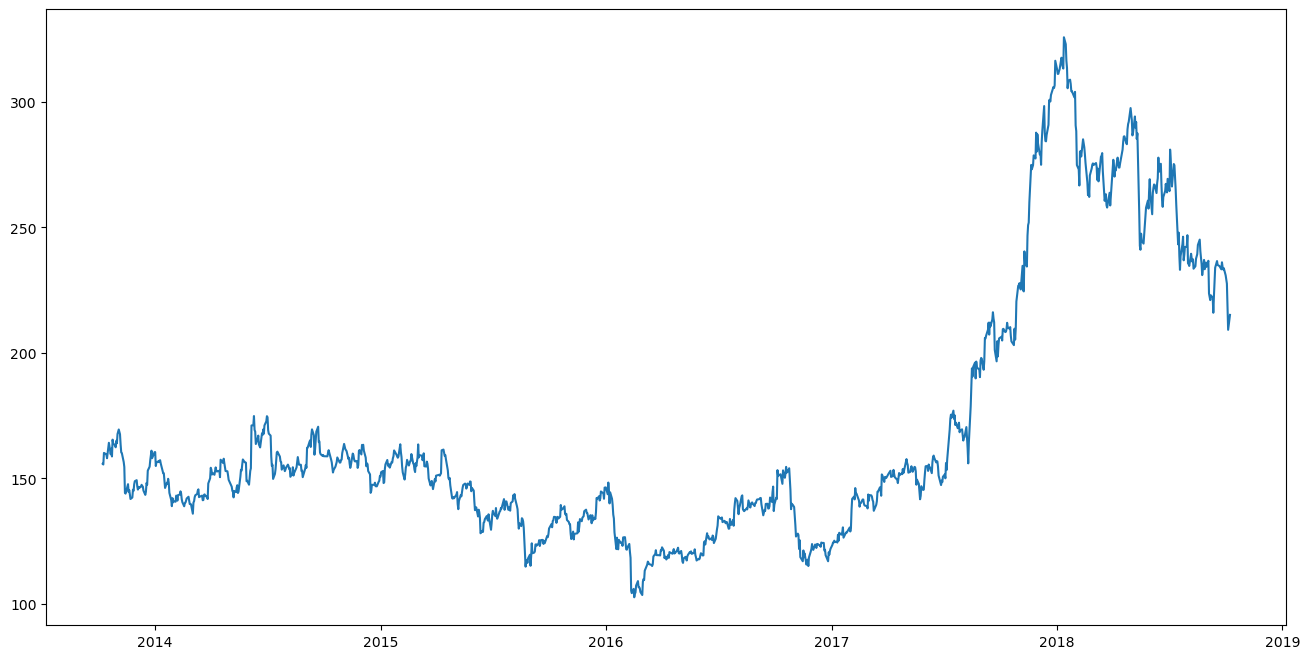

In [38]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'])
plt.show()

In [39]:
raw_data = data.copy()

In [40]:
# Thư viện giúp tạo thêm đặc trung mới
# !pip install fastai

In [41]:
from fastai.tabular.all import add_datepart
add_datepart(raw_data, 'Date')

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,
2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94,2013,10,41,8,1,281,False,False,False,False,False,False,1.381190e+09
2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49,2013,10,41,9,2,282,False,False,False,False,False,False,1.381277e+09
2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80,2013,10,41,10,3,283,False,False,False,False,False,False,1.381363e+09
2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76,2013,10,41,11,4,284,False,False,False,False,False,False,1.381450e+09
2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09,2013,10,42,14,0,287,False,False,False,False,False,False,1.381709e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,2018,10,40,1,0,274,False,True,False,True,False,False,1.538352e+09
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,2018,10,40,3,2,276,False,False,False,False,False,False,1.538525e+09
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,2018,10,40,4,3,277,False,False,False,False,False,False,1.538611e+09


In [42]:
# check day is monday or friday
raw_data['mon_fri'] = 0
for i in raw_data.index:
    if (raw_data['Dayofweek'][i] == 0 or raw_data['Dayofweek'][i] == 4):
        raw_data.loc[i, 'mon_fri'] = 1
    else:
        raw_data.loc[i, 'mon_fri'] = 0

display(raw_data.tail(2))

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year,Month,Week,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,mon_fri
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-05,217.0,218.60,205.90,210.25,209.20,3519515.0,7407.06,2018,10,40,...,4,278,False,False,False,False,False,False,1.538698e+09,1
2018-10-08,208.0,222.25,206.85,216.00,215.15,4642146.0,10062.83,2018,10,41,...,0,281,False,False,False,False,False,False,1.538957e+09,1


# Moving average

In [43]:
# Moving average
train = raw_data[:987]
valid = raw_data[987:]

display(train.shape)
display(valid.shape)

(987, 21)

(248, 21)

In [44]:
preds = []
for i in range(0,248):
    prev = train['Close'][len(train) - 248 + i:].sum() + sum(preds)
    avg = prev/248
    preds.append(avg)

rms = np.sqrt(np.mean(np.power((np.array(valid['Close']) - preds),2)))
print(rms)

104.51415465984356


In [45]:
DateIndex = valid.index
valid = valid.reset_index(drop=True)
valid['Predictions'] = preds
valid.index = DateIndex

<Axes: xlabel='Date', ylabel='Close'>

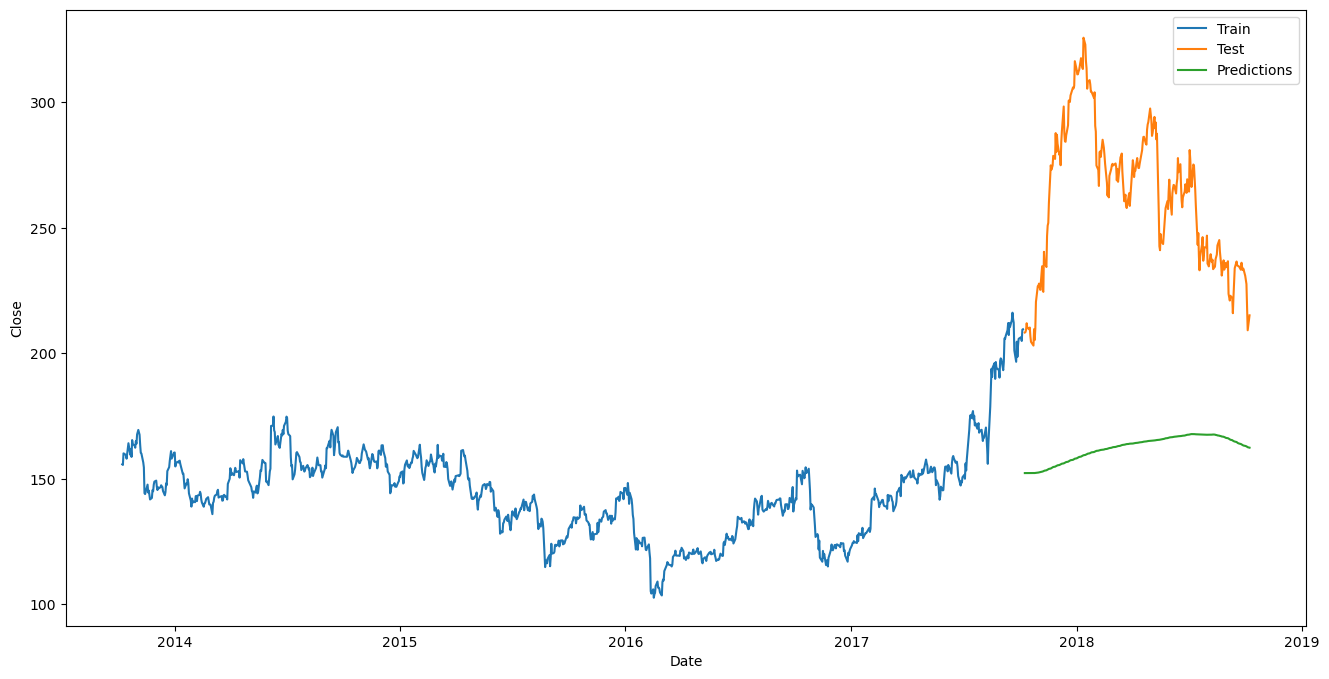

In [46]:
plt.figure(figsize=(16,8))
sns.lineplot(data=train['Close'], label='Train')
sns.lineplot(data=valid['Close'], label='Test')
sns.lineplot(data=valid['Predictions'], label='Predictions')

# Linear Regression

In [47]:
# linear regression
from sklearn.linear_model import LinearRegression

train = raw_data[:987]
test = raw_data[987:]

train = train.drop(['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)', 'Elapsed'], axis=1)
test = test.drop(['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)', 'Elapsed'], axis=1)

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']
display(x_train)
model = LinearRegression()
model.fit(x_train, y_train)

preds = model.predict(x_test)
rms = np.sqrt(np.mean(np.power((np.array(valid['Close']) - preds),2)))
print(rms)

In [48]:
DateIndex = test.index
test = test.reset_index(drop=True)
test['Predictions'] = preds
test.index = DateIndex

In [49]:
plt.figure(figsize=(16,8))
sns.lineplot(data=train['Close'], label='Train')
sns.lineplot(data=test['Close'], label='Test')
sns.lineplot(data=test['Predictions'], label='Predictions')

In [50]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

train = raw_data[:987]
test = raw_data[987:]

train = train.drop(['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)', 'Elapsed'], axis=1)
test = test.drop(['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)', 'Elapsed'], axis=1)

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_test = test.drop('Close', axis=1)
y_test = test['Close']

poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)

preds = model.predict(x_test)
rms = np.sqrt(np.mean(np.power((np.array(valid['Close']) - preds),2)))
print(rms)

In [51]:
DateIndex = test.index
test = test.reset_index(drop=True)
test['Predictions'] = preds
test.index = DateIndex

In [52]:
plt.figure(figsize=(16,8))
sns.lineplot(data=train['Close'], label='Train')
sns.lineplot(data=test['Close'], label='Test')
sns.lineplot(data=test['Predictions'], label='Predictions')

# K-Nearest Neighbors

## Case1: Without Scaler

In [53]:
# # K-Nearest Neighbors

# # Case1: Not Scaler
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
# knn = KNeighborsRegressor()
# model = GridSearchCV(knn, params, cv=5)
# model.fit(x_train, y_train)

# print(model.best_params_)

# preds = model.predict(x_test)
# rms = np.sqrt(np.mean(np.power((np.array(valid['Close']) - preds),2)))
# print(rms)

In [54]:
# DateIndex = test.index
# test = test.reset_index(drop=True)
# test['Predictions'] = preds
# test.index = DateIndex

In [55]:
# plt.figure(figsize=(16,8))
# sns.lineplot(data=train['Close'], label='Train')
# sns.lineplot(data=test['Close'], label='Test')
# sns.lineplot(data=test['Predictions'], label='Predictions')

## Case 2: Scaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))

# data_KNN = raw_data.copy()
# data_KNN = data_KNN.drop(['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)', 'Elapsed'], axis=1)

# data_KNN_features = data_KNN.drop('Close', axis=1)
# data_KNN_target = data_KNN['Close']

In [57]:
# data_KNN_scaled = scaler.fit_transform(data_KNN_features)
# data_KNN_scaled = pd.DataFrame(data_KNN_scaled, columns=data_KNN_features.columns)
# data_KNN_scaled.head()

In [58]:
# train = data_KNN[:987]
# test = data_KNN[987:]

# X_train = data_KNN_scaled[:987]
# y_train = train['Close']

# X_test = data_KNN_scaled[987:]
# y_test = test['Close']

# params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
# knn = KNeighborsRegressor()
# model = GridSearchCV(knn, params, cv=5)
# model.fit(X_train, y_train)

# print(model.best_params_)

# preds = model.predict(X_test)
# rms = np.sqrt(np.mean(np.power((np.array(valid['Close']) - preds),2)))
# print(rms)

In [59]:
# DateIndex = test.index
# test = test.reset_index(drop=True)
# test['Predictions'] = preds
# test.index = DateIndex

In [60]:
# # plot data and predictions using sns
# plt.figure(figsize=(16,8))
# sns.lineplot(data=train['Close'], label='Train')
# sns.lineplot(data=test['Close'], label='Test')
# sns.lineplot(data=test['Predictions'], label='Predictions')
# plt.show()

# Auto ARIMA

In [61]:
from pmdarima import auto_arima

train = raw_data[:987]
test = raw_data[987:]

train_arima = train["Close"]
test_arima = test["Close"]

model = auto_arima(
    train_arima,
    start_q=1,
    start_p=1,
    max_p=3,
    max_q=3,
    m=12,
    start_P=0,
    seasonal=True,
    d=1,
    D=1,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
)

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.92 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.43 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.60 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=0.76 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.49 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.34 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.19 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=0.53 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=1.15 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.382, Time=1.45 sec

Best model:  ARIMA(0,1,0

In [62]:
result = model.fit(train_arima)
forecast = result.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, columns=["Prediction"]).set_index(test.index)

rms = np.sqrt(np.mean(np.power((np.array(test['Close']) - np.array(forecast['Prediction'])),2)))
print(rms)
display(forecast.head())
display(forecast.shape)
display(test.shape)

54.54322772069917


,Prediction
Date,
2017-10-09,212.067644
2017-10-10,211.893666
2017-10-11,213.446288
2017-10-12,212.614440
2017-10-13,213.373743


(248, 1)

(248, 21)

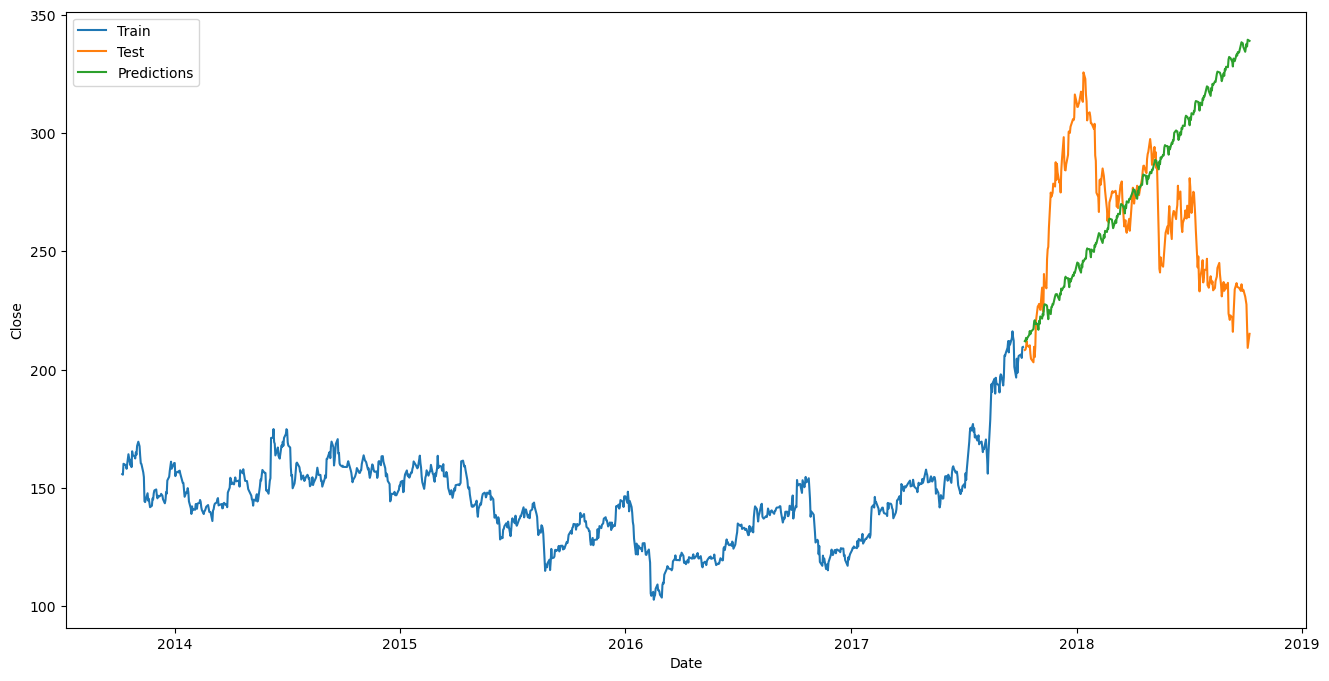

In [63]:
# plot data and predictions using sns
plt.figure(figsize=(16,8))
sns.lineplot(data=train['Close'], label='Train')
sns.lineplot(data=test['Close'], label='Test')
sns.lineplot(data=forecast['Prediction'], label='Predictions')
plt.show()

# LSTM

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_LSTM = raw_data[['Close']].copy()

train = data_LSTM[:987]
test = data_LSTM[987:]

data_LSTM_scaled = scaler.fit_transform(data_LSTM)
display(data_LSTM_scaled)
display(data_LSTM_scaled.shape)


array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

(1235, 1)

In [32]:
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(data_LSTM_scaled[i-60:i, 0])
    y_train.append(data_LSTM_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
display(x_train)
display(x_train.shape)

array([[0.23823398, 0.2371134 , 0.25773196, ..., 0.25907665, 0.25930076,
        0.23442403],
       [0.2371134 , 0.25773196, 0.25728373, ..., 0.25930076, 0.23442403,
        0.24069924],
       [0.25773196, 0.25728373, 0.25459435, ..., 0.23442403, 0.24069924,
        0.24271627],
       ...,
       [0.24697445, 0.28641865, 0.29964142, ..., 0.45047064, 0.46234872,
        0.46526221],
       [0.28641865, 0.29964142, 0.31869117, ..., 0.46234872, 0.46526221,
        0.45853877],
       [0.29964142, 0.31869117, 0.32608696, ..., 0.46526221, 0.45853877,
        0.4787091 ]])

(927, 60)

In [33]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [34]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
np.random.seed(1)
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=1)

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
# predicting 246 values, using past 60 from the train data
inputs = data_LSTM[len(data_LSTM) - len(test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
display(X_test.shape)

(248, 60, 1)

In [ ]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

8/8 [==============================] - 1s 9ms/step


In [ ]:
rms = np.sqrt(np.mean(np.power((test-closing_price),2)))
display(rms)

Close    6.399618
dtype: float64

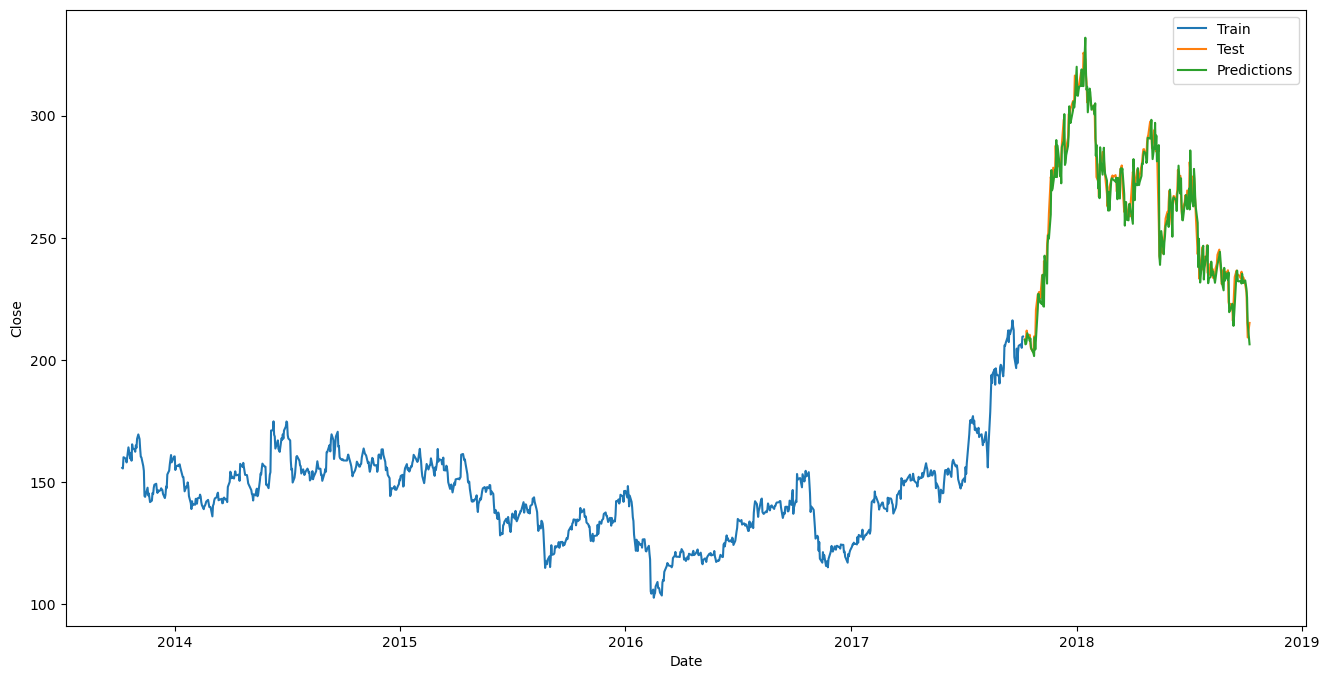

: 

In [ ]:
DateIndex = test.index
test = test.reset_index(drop=True)
test['Predictions'] = closing_price
test.index = DateIndex

# plot data and predictions using sns
plt.figure(figsize=(16,8))
sns.lineplot(data=train['Close'], label='Train')
sns.lineplot(data=test['Close'], label='Test')
sns.lineplot(data=test['Predictions'], label='Predictions')
plt.show()